<img style="float: right; height: 100px" src="https://www.wekeo.eu/themes/charabimba/images/logo-ecmwf_0.png" />

In [ ]:
#!/usr/bin/env python
import xarray as xr
import os
#from ecmwfapi import ECMWFDataServer
from ecmwfapi import ECMWFService

## Mars Catalogue operational Archive
https://apps.ecmwf.int/mars-catalogue/?class=od

In [15]:
# ICON-EU Area definition
#        W    S     E    N   DWE  DSN
# AREA=336.5,29.5,45.0,70.5,0.0625,0.0625
#
# MARS Convention: North/West/South/East
# see https://confluence.ecmwf.int/display/UDOC/Post-processing+keywords#Post-processingkeywords-area
year=2019
month=11
day=14
step="0/6/12/24"
filename = "/shared/eduard/ifs_global_regular-lat-lon_{0}{1}{2}00_{3}_t_2m.grib2".format(year,month,day, step.replace('/',','))
mars_cli_request = """
retrieve,
    class=od,
    date={0}-{1}-{2},
    expver=1,
    levtype=sfc,
    param=167.128,
    step={3},
    stream=oper,
    time=00:00:00,
    type=fc,
    target="{4}",
    area=70.5/-23,5/29.5/45,
    grid=0.0625/0.0625
""".format(year,month,day,step,filename)
mars_api_request = {
    'class'   : "od",
    'date'    : "{0}-{1}-{2}".format(year,month,day),
    'expver'  : "1",
    'levtype' : "sfc",
    'param'   : "167.128",
    'step'    : "0/6/12/24",
    'stream'  : "oper",
    'time'    : "00:00:00",
    'type'    : "fc",
    'area'    : "70.5/336.5/29.5/45", #icon-eu
    'grid'    : "0.0625/0.0625" #icon-eu
}
mars_api_request, filename

({'class': 'od',
  'date': '2019-11-14',
  'expver': '1',
  'levtype': 'sfc',
  'param': '167.128',
  'step': '0/6/12/24',
  'stream': 'oper',
  'time': '00:00:00',
  'type': 'fc',
  'area': '70.5/336.5/29.5/45',
  'grid': '0.0625/0.0625'},
 '/shared/eduard/ifs_global_regular-lat-lon_2019111400_0,6,12,24_t_2m.grib2')

### Check request status
Check the status of your request at [https://apps.ecmwf.int/webapi-activity/](https://apps.ecmwf.int/webapi-activity/).

To go directly to your job, go to https://apps.ecmwf.int/webmars/joblist/ ``<your mars request id>``

In [3]:
if not os.path.exists(filename):
    server = ECMWFService("mars")
    server.execute(mars_api_request,filename)

In [4]:
x = xr.open_dataset(filename, engine='cfgrib')

In [5]:
# show what's inside
x

<xarray.Dataset>
Dimensions:     (latitude: 657, longitude: 1097, step: 4)
Coordinates:
    number      int64 ...
    time        datetime64[ns] ...
  * step        (step) timedelta64[ns] 00:00:00 06:00:00 ... 1 days 00:00:00
    surface     int64 ...
  * latitude    (latitude) float64 70.5 70.44 70.38 70.31 ... 29.62 29.56 29.5
  * longitude   (longitude) float64 -23.5 -23.44 -23.38 ... 44.88 44.94 45.0
    valid_time  (step) datetime64[ns] ...
Data variables:
    t2m         (step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2019-11-15T10:55:02 GRIB to CDM+CF via cfgrib-0....

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert to celsius
x = x - 273.15

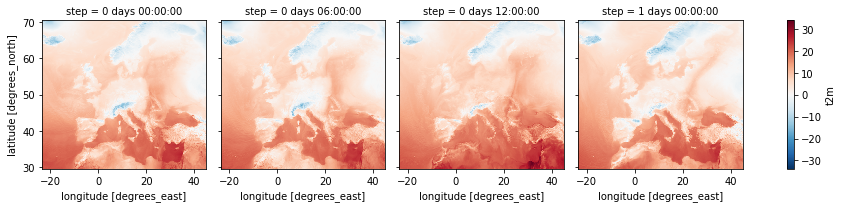

In [7]:
# Plotting xarray https://xarray.pydata.org/en/v0.7.1/plotting.html
x.t2m.plot(x="longitude", y="latitude", col="step") #, col_wrap=2)

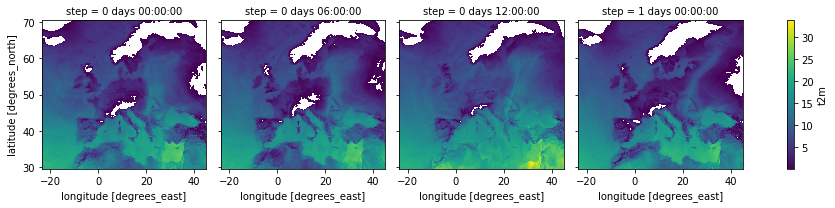

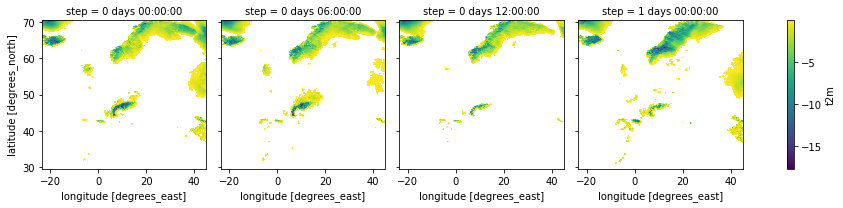

In [8]:
# temperatures above zero
x.where(x.t2m > 0.0).t2m.plot(x="longitude",y="latitude", col="step")
# temperatures below zero
x.where(x.t2m <= 0.0).t2m.plot(x="longitude",y="latitude", col="step")

In [9]:
# pick a single temperature, show values for all steps
x.isel(latitude=340, longitude=34).t2m.values

array([10.341461, 10.447235, 10.900543, 10.176666], dtype=float32)

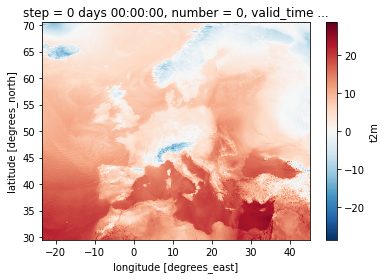

In [10]:
# plot the first time step
x.sel(step=0).t2m.plot()

In [11]:
# dimensions in lat lon
lats = len(x.latitude)
lons = len(x.longitude)
(lats,lons)

(657, 1097)

In [12]:
# metadata
x.attrs

OrderedDict([('GRIB_edition', 1),
             ('GRIB_centre', 'ecmf'),
             ('GRIB_centreDescription',
              'European Centre for Medium-Range Weather Forecasts'),
             ('GRIB_subCentre', 0),
             ('Conventions', 'CF-1.7'),
             ('institution',
              'European Centre for Medium-Range Weather Forecasts'),
             ('history',
              '2019-11-15T10:55:02 GRIB to CDM+CF via cfgrib-0.9.5.4/ecCodes-2.14.0 with {"source": "/shared/eduard/ifs_global_regular-lat-lon_2019111400_0,6,12,24_t_2m.grib2", "filter_by_keys": {}, "encode_cf": ["parameter", "time", "geography", "vertical"]}')])

In [13]:
( len(x.isel(step=0).latitude.values), len(x.longitude.values) )

(657, 1097)

In [14]:
# get the lat lon of a specific grid point
x.latitude.values[452],x.latitude.values[214]

(42.25, 57.125)